<a href="https://colab.research.google.com/github/mehdihasan010/Learn_ML/blob/master/rice_leafs_disease_classification_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd

In [4]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/dataset/Rice Leaf Disease Images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/dataset/Rice Leaf Disease Images/Blast/BLAST2_149.JPG
/content/drive/MyDrive/dataset/Rice Leaf Disease Images/Blast/BLAST4_131.jpg
/content/drive/MyDrive/dataset/Rice Leaf Disease Images/Blast/BLAST5_070.JPG
/content/drive/MyDrive/dataset/Rice Leaf Disease Images/Blast/BLAST5_141.jpg
/content/drive/MyDrive/dataset/Rice Leaf Disease Images/Blast/BLAST2_059.JPG
/content/drive/MyDrive/dataset/Rice Leaf Disease Images/Blast/BLAST7_085.jpg
/content/drive/MyDrive/dataset/Rice Leaf Disease Images/Blast/BLAST4_150.JPG
/content/drive/MyDrive/dataset/Rice Leaf Disease Images/Blast/BLAST4_154.jpg
/content/drive/MyDrive/dataset/Rice Leaf Disease Images/Blast/BLAST1_044.jpg
/content/drive/MyDrive/dataset/Rice Leaf Disease Images/Blast/BLAST7_070.JPG
/content/drive/MyDrive/dataset/Rice Leaf Disease Images/Blast/BLAST2_093.jpg
/content/drive/MyDrive/dataset/Rice Leaf Disease Images/Blast/BLAST1_130.JPG
/content/drive/MyDrive/da

1. Bacterial Blight (1584 images)

2. Blast(1440 images)

3. Brown Spot(1600 images)

4. Tungro(1308 images)

In [5]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import sklearn
import tensorflow as tf
from tensorflow import keras
from PIL import Image as im
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout,MaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from PIL import Image as im
from pathlib import Path
from tqdm.notebook import tqdm
from sklearn import preprocessing
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt

In [6]:
df = tf.keras.preprocessing.image_dataset_from_directory(
    r"/content/drive/MyDrive/dataset/Rice Leaf Disease Images",
    shuffle=True,
    image_size=(224,224),
    batch_size=64
)

Found 5932 files belonging to 4 classes.


In [8]:
root_path = '/content/drive/MyDrive/dataset/Rice Leaf Disease Images/'
class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)
class_dis = [len(os.listdir(root_path + name)) for name in class_names]
print(f"Total Number of Classes : {n_classes} \nClass Names : {class_names}")


Total Number of Classes : 4 
Class Names : ['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']


# Data Visualization

In [9]:
fig = px.pie(names=class_names, values=class_dis, title="Class Distribution", hole=0.4)
fig.update_layout({'title':{'x':0.5}})
fig.show()

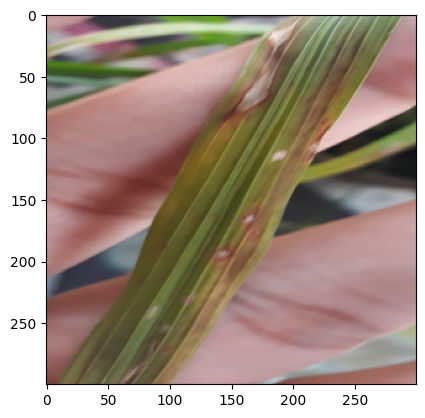

In [10]:
import matplotlib.image as img
image = img.imread("/content/drive/MyDrive/dataset/Rice Leaf Disease Images/Blast/BLAST1_004.jpg")
plt.imshow(image)

Working with 1308 images
Image examples: 
TUNGRO2_086.jpg


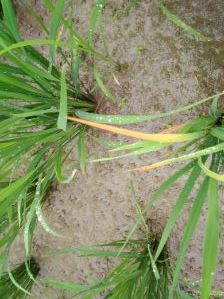

TUNGRO2_001.jpg


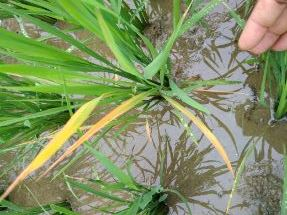

TUNGRO4_069.jpg


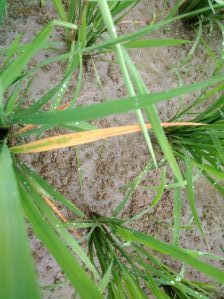

TUNGRO1_061.jpg


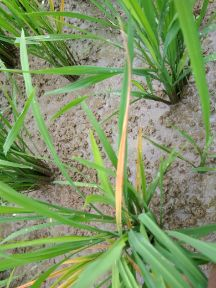

TUNGRO1_058.jpg


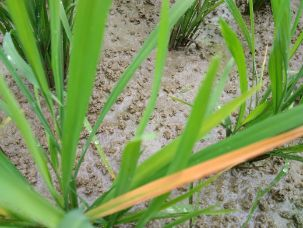

TUNGRO1_095.JPG


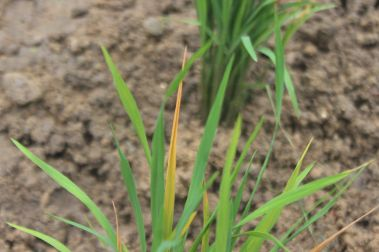

TUNGRO5_192.JPG


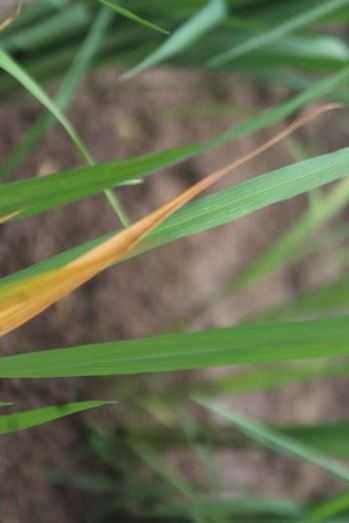

TUNGRO2_173.JPG


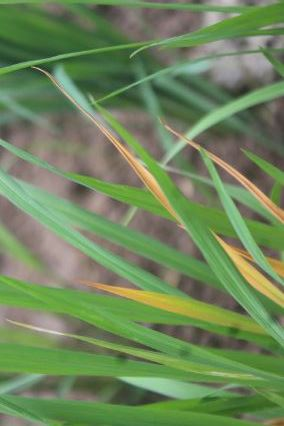

TUNGRO4_224.JPG


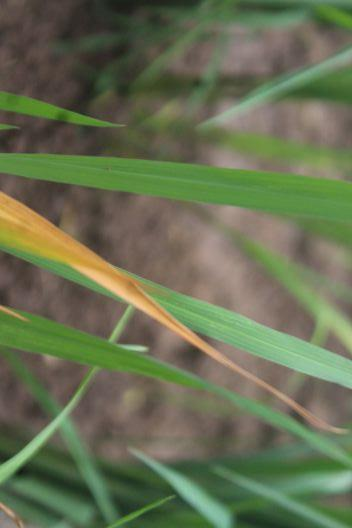

TUNGRO3_199.JPG


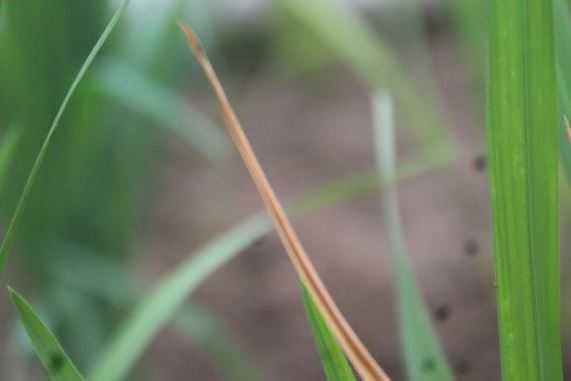

In [11]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object

image_path = "/content/drive/MyDrive/dataset/Rice Leaf Disease Images"
folder = image_path+'/Tungro'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

Working with 1440 images
Image examples: 
BLAST6_008.jpg


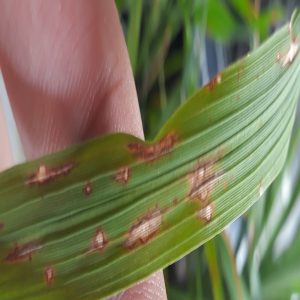

BLAST1_083.jpg


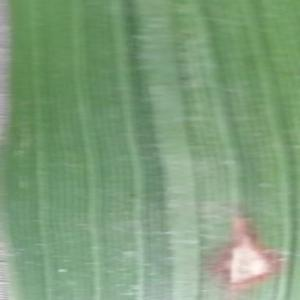

BLAST1_012.jpg


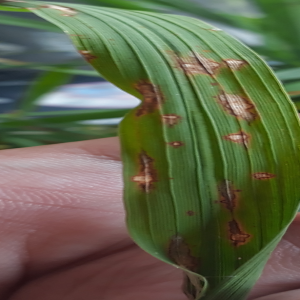

BLAST6_156.jpg


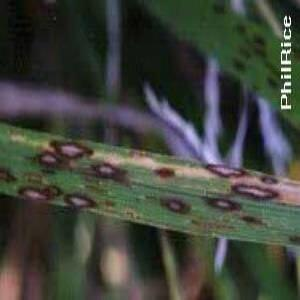

BLAST3_118.jpg


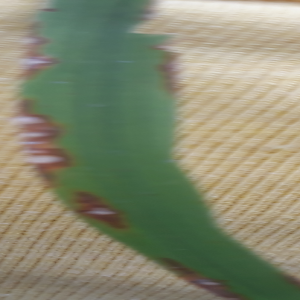

BLAST3_052.jpg


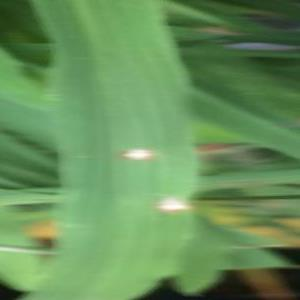

BLAST3_137.JPG


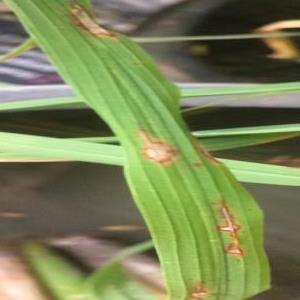

BLAST7_131.jpg


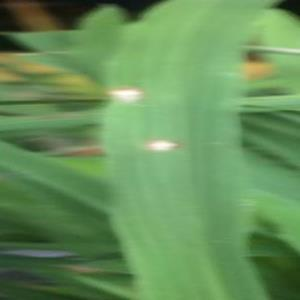

BLAST3_062.jpg


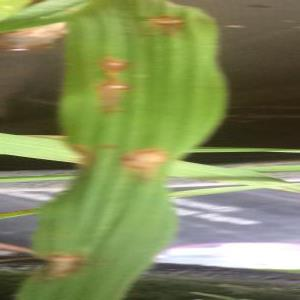

BLAST8_048.JPG


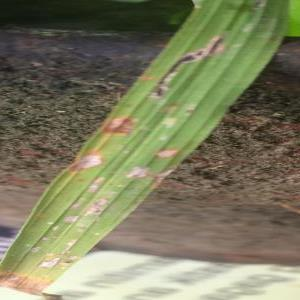

In [12]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object

image_path = "/content/drive/MyDrive/dataset/Rice Leaf Disease Images"
folder = image_path+'/Blast'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

Working with 1584 images
Image examples: 
BACTERIALBLIGHT_159.jpg


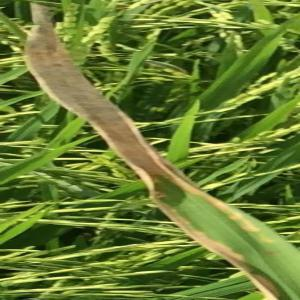

BACTERAILBLIGHT5_043.jpg


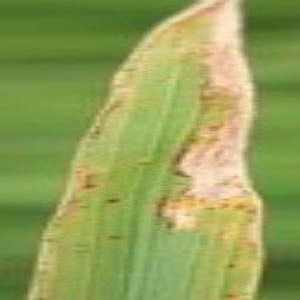

BACTERIALBLIGHT_231.JPG


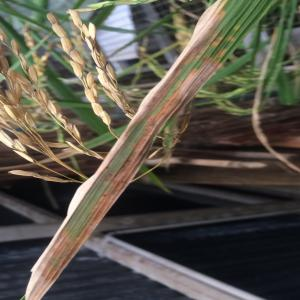

BACTERAILBLIGHT3_264.jpg


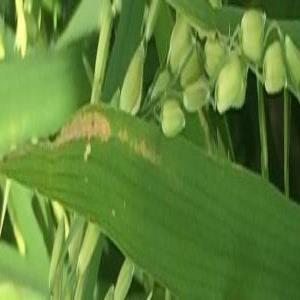

BACTERIALBLIGHT1_207.jpg


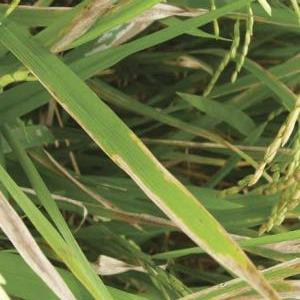

BACTERIALBLIGHT2_091.jpg


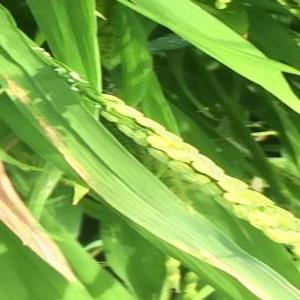

BACTERAILBLIGHT4_155.jpg


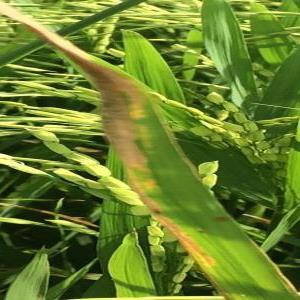

BACTERAILBLIGHT5_157.jpg


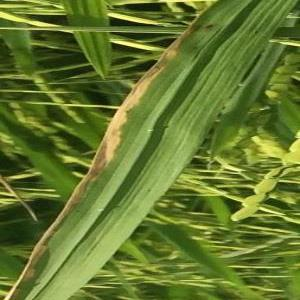

BACTERIALBLIGHT_112.jpg


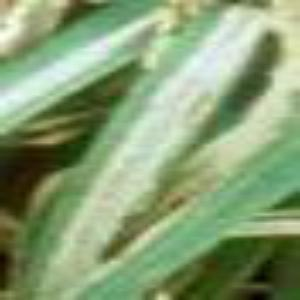

BACTERIALBLIGHT2_001.jpg


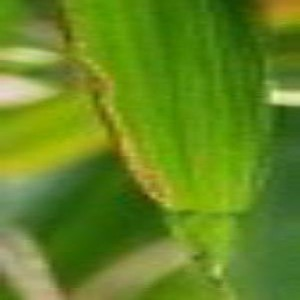

In [13]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object

image_path = "/content/drive/MyDrive/dataset/Rice Leaf Disease Images"
folder = image_path+'/Bacterialblight'



onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

# Image Data Generator

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/dataset/Rice Leaf Disease Images'

# Initialize the data generator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # reserve 20% of the data for validation
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [15]:
# Generate training data
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    subset='training',  # set as training data
    class_mode='categorical'
)

# Generate validation data
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(224,224),
    color_mode="rgb",
    batch_size=32,
    subset='validation',  # set as validation data
    class_mode='categorical'
)

Found 4747 images belonging to 4 classes.
Found 1185 images belonging to 4 classes.


# Custom CNN Model

In [16]:
BATCH_SIZE = 32
IMAGE_SIZE = [224, 224]
CHANNELS=3
EPOCHS=20

In [17]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4
model=Sequential()
#covolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
#covolution layer
model.add(Conv2D(32,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
#covolution layer
model.add(Conv2D(64,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
#covolution layer
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
#i/p layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
#o/p layer
model.add(Dense(4,activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 111, 111, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                        

In [19]:
model.compile(
    optimizer = Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
history = model.fit(train_generator,batch_size=BATCH_SIZE,validation_data=validation_generator,epochs=EPOCHS)

Epoch 1/20
149/149 [==============================] - 1445s 10s/step - loss: 0.8066 - accuracy: 0.7162 - val_loss: 1.6040 - val_accuracy: 0.2852
Epoch 2/20
149/149 [==============================] - 516s 3s/step - loss: 0.4587 - accuracy: 0.8311 - val_loss: 2.7815 - val_accuracy: 0.2844
Epoch 3/20
149/149 [==============================] - 474s 3s/step - loss: 0.3556 - accuracy: 0.8685 - val_loss: 0.6571 - val_accuracy: 0.7198
Epoch 4/20
149/149 [==============================] - 461s 3s/step - loss: 0.3050 - accuracy: 0.8890 - val_loss: 0.5479 - val_accuracy: 0.7941
Epoch 5/20
149/149 [==============================] - 458s 3s/step - loss: 0.2531 - accuracy: 0.9060 - val_loss: 0.2376 - val_accuracy: 0.9021
Epoch 6/20
149/149 [==============================] - 489s 3s/step - loss: 0.2116 - accuracy: 0.9229 - val_loss: 0.3596 - val_accuracy: 0.8785
Epoch 7/20
149/149 [==============================] - 447s 3s/step - loss: 0.2276 - accuracy: 0.9193 - val_loss: 1.7812 - val_accuracy: 0.62

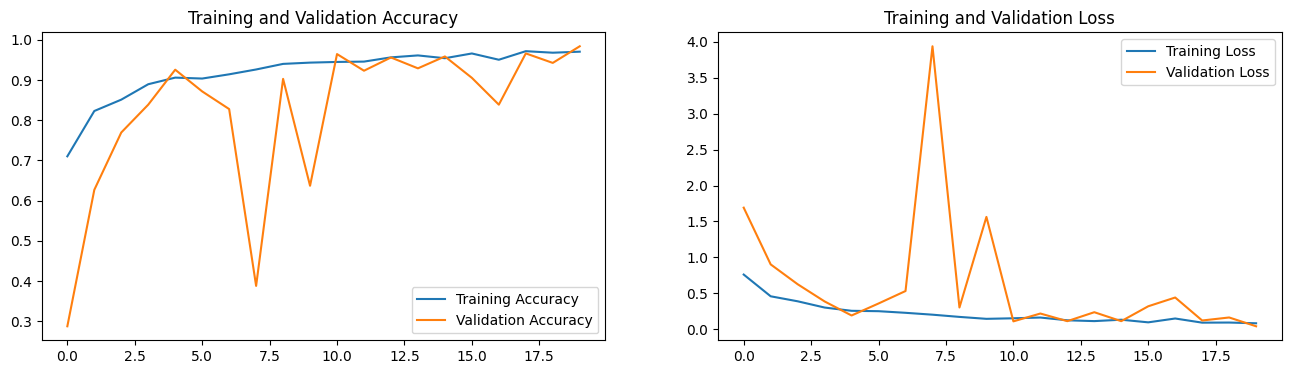

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

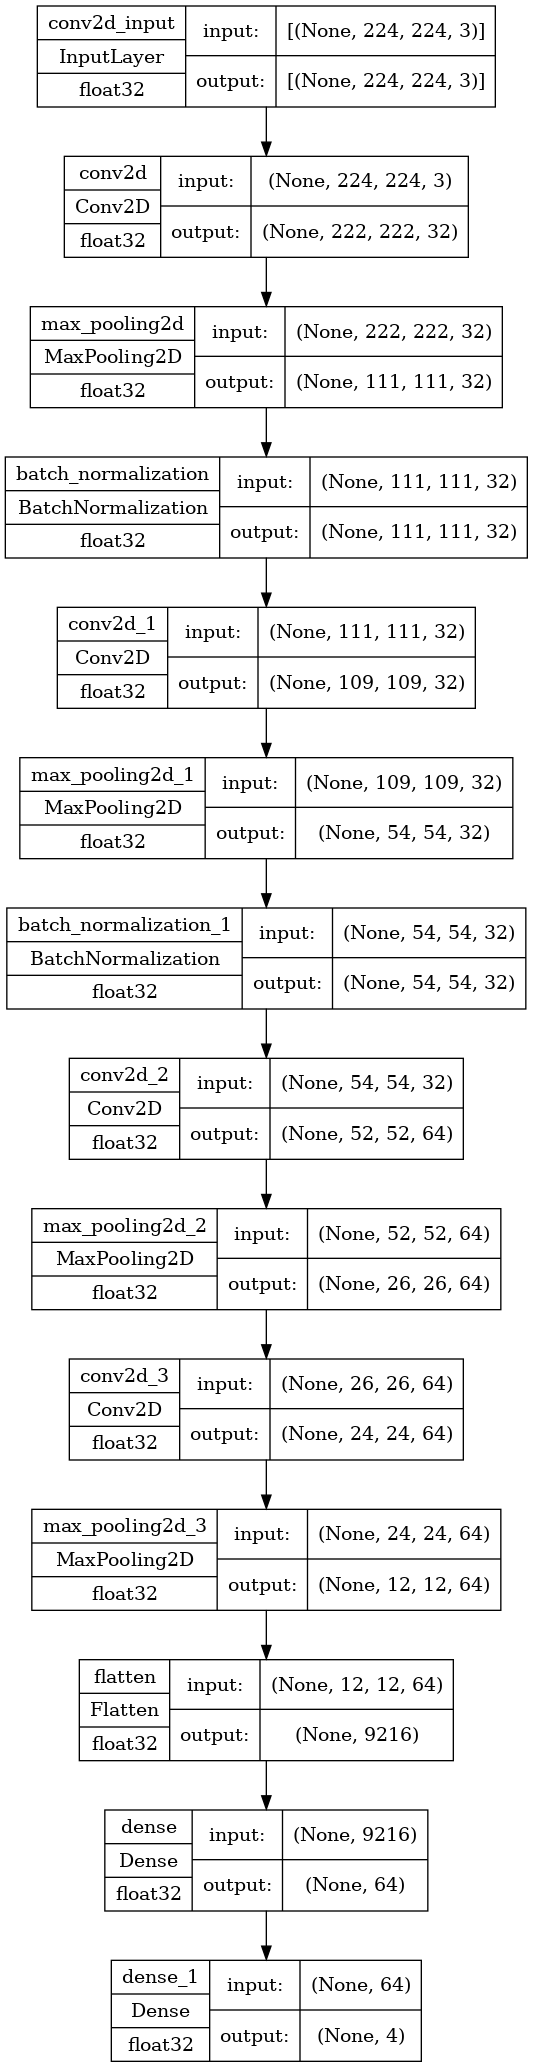

In [ ]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes = True, show_dtype = True)

In [ ]:
import numpy as np

def extract_data(generator):
    data_list = []
    labels_list = []
    for _ in range(generator.__len__()):
        data, labels = generator.next()
        data_list.append(data)
        labels_list.append(labels)
    x = np.vstack(data_list)
    y = np.vstack(labels_list)
    return x, y

x_train, y_train = extract_data(train_generator)
x_test, y_test = extract_data(validation_generator)

In [ ]:
loss = model.evaluate(x_test,y_test)
print("Test Acc: " + str(loss[1]))

38/38 [==============================] - 1s 18ms/step - loss: 0.0266 - accuracy: 0.9924
Test Acc: 0.9924050569534302


In [ ]:
preds = model.predict(x_test)
y_pred = np.argmax(preds , axis = 1 )

38/38 [==============================] - 1s 15ms/step


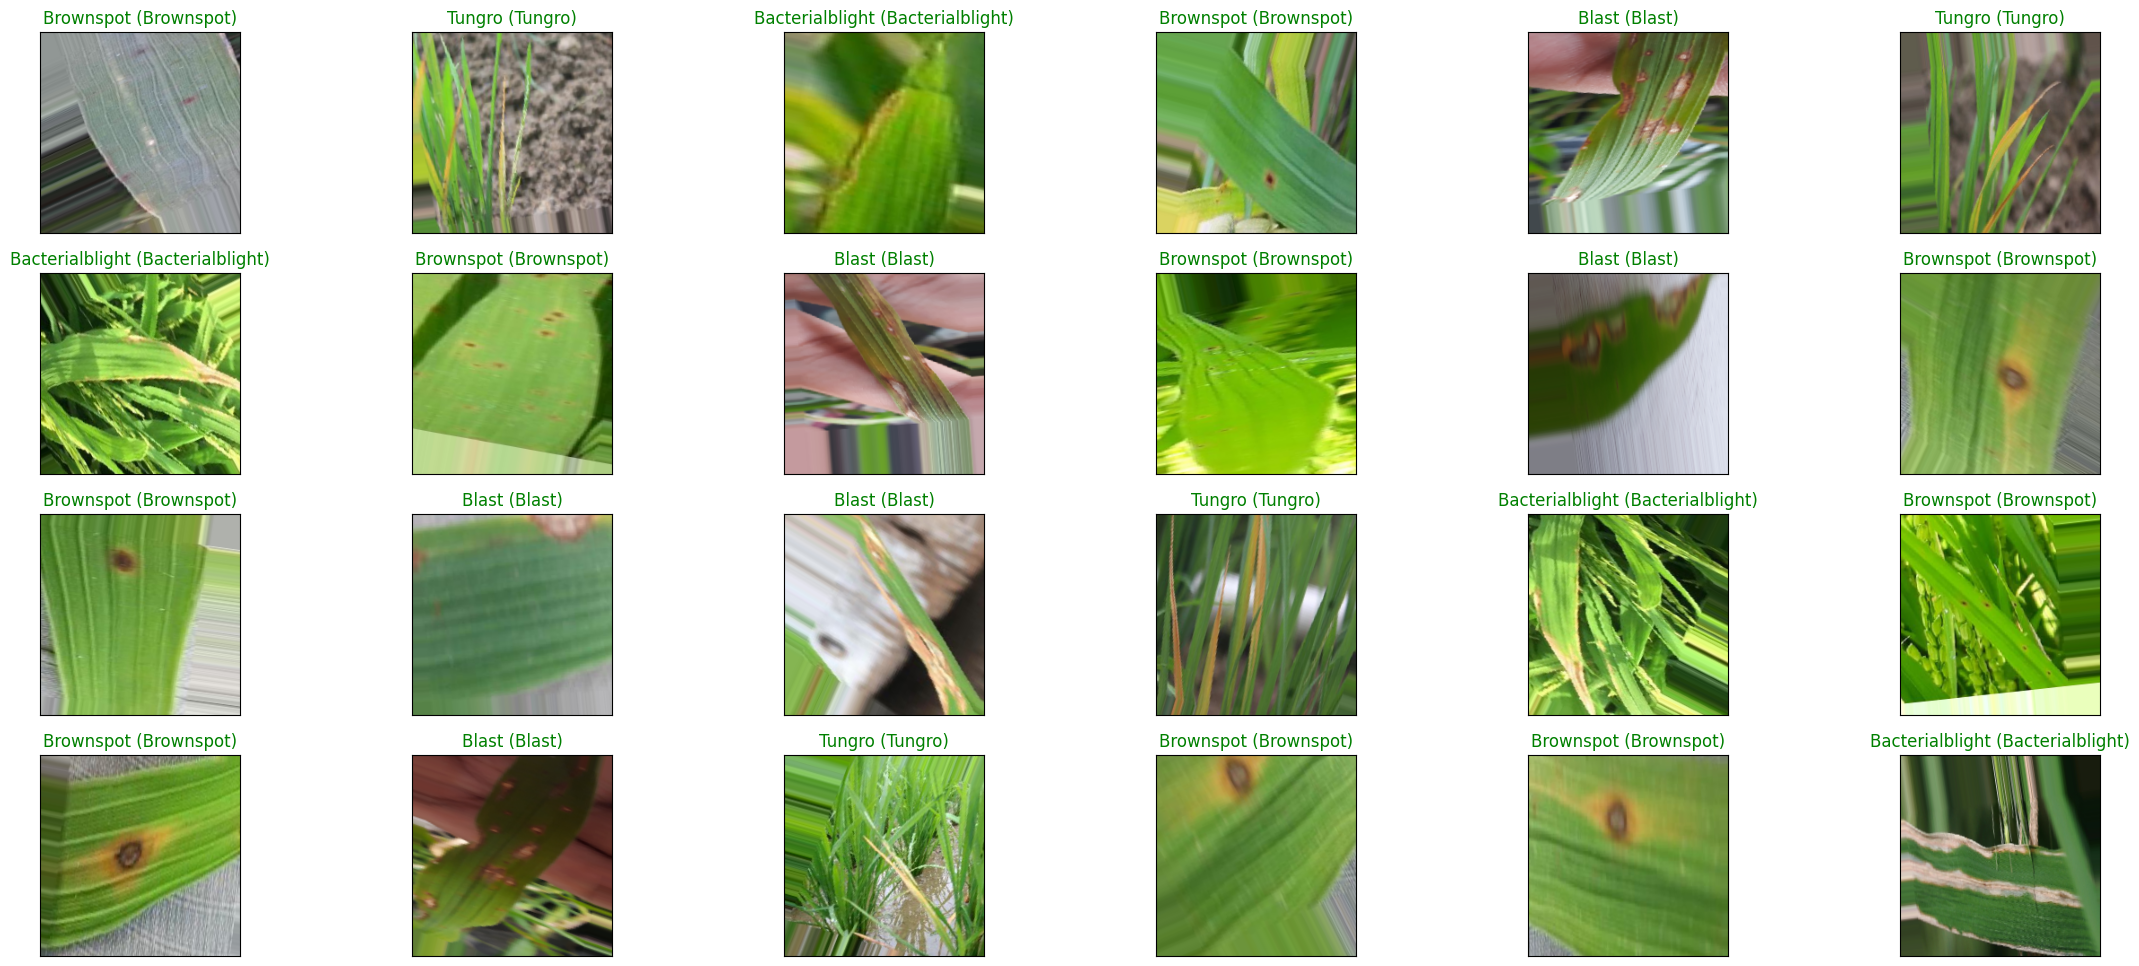

In [ ]:
label_dict = {0 : 'Bacterialblight', 1 : 'Blast', 2 : 'Brownspot', 3 : 'Tungro'}

figure = plt.figure(figsize=(28, 12))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=24)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = label_dict[(y_pred[index])]
    true_index = label_dict[np.argmax(y_test,axis=1)[index]]

    ax.set_title("{} ({})".format((predict_index),
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))

# Transfer Learning : VGG19

In [ ]:
IMAGE_SIZE=[224,224]

In [ ]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg19.layers:
    print(layer)

In [ ]:
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
for layer in vgg19.layers:
    print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_conv4 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_conv4 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_conv4 False
block5_pool False


In [ ]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model_vgg = Sequential()

model_vgg.add(vgg19)
model_vgg.add(Flatten())
model_vgg.add(Dropout(0.2))
model_vgg.add(Dense(64,activation='relu'))
model_vgg.add(Dropout(0.2))
model_vgg.add(Dense(4,activation='softmax'))

In [ ]:
model_vgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                1605696   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 21,630,340
Trainable params: 1,605,956
N

In [ ]:
model_vgg.compile(
    optimizer = Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
r = model_vgg.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=20,
  steps_per_epoch=len(train_generator),
  validation_steps=len(validation_generator)
)


Epoch 1/20
149/149 [==============================] - 90s 563ms/step - loss: 0.8159 - accuracy: 0.6707 - val_loss: 0.6161 - val_accuracy: 0.7367
Epoch 2/20
149/149 [==============================] - 82s 551ms/step - loss: 0.5345 - accuracy: 0.7782 - val_loss: 0.4492 - val_accuracy: 0.8059
Epoch 3/20
149/149 [==============================] - 83s 555ms/step - loss: 0.4722 - accuracy: 0.8072 - val_loss: 0.5088 - val_accuracy: 0.7907
Epoch 4/20
149/149 [==============================] - 82s 550ms/step - loss: 0.4094 - accuracy: 0.8348 - val_loss: 0.3044 - val_accuracy: 0.8734
Epoch 5/20
149/149 [==============================] - 82s 548ms/step - loss: 0.3724 - accuracy: 0.8447 - val_loss: 0.3670 - val_accuracy: 0.8608
Epoch 6/20
149/149 [==============================] - 83s 556ms/step - loss: 0.3697 - accuracy: 0.8418 - val_loss: 0.2933 - val_accuracy: 0.8819
Epoch 7/20
149/149 [==============================] - 83s 554ms/step - loss: 0.3237 - accuracy: 0.8709 - val_loss: 0.3013 - val_ac

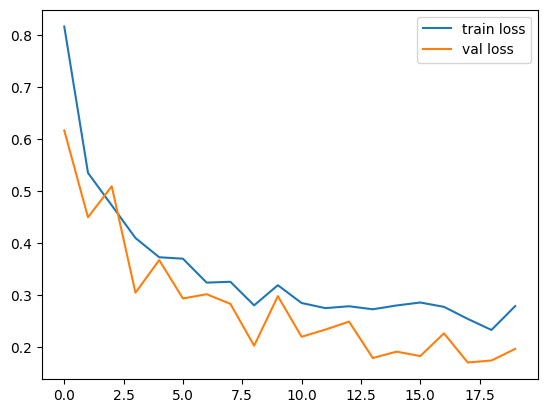

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

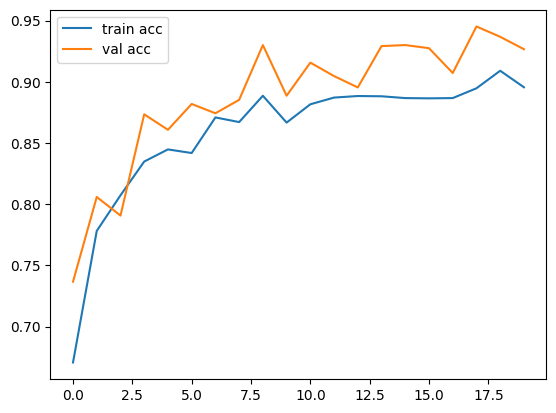

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
loss_vgg = model_vgg.evaluate(x_test,y_test)
print("Test Acc: " + str(loss_vgg[1]))

38/38 [==============================] - 6s 153ms/step - loss: 0.1988 - accuracy: 0.9173
Test Acc: 0.9172995686531067


In [ ]:
preds_vgg = model_vgg.predict(x_test)
y_pred_vgg = np.argmax(preds_vgg , axis = 1 )

38/38 [==============================] - 6s 157ms/step


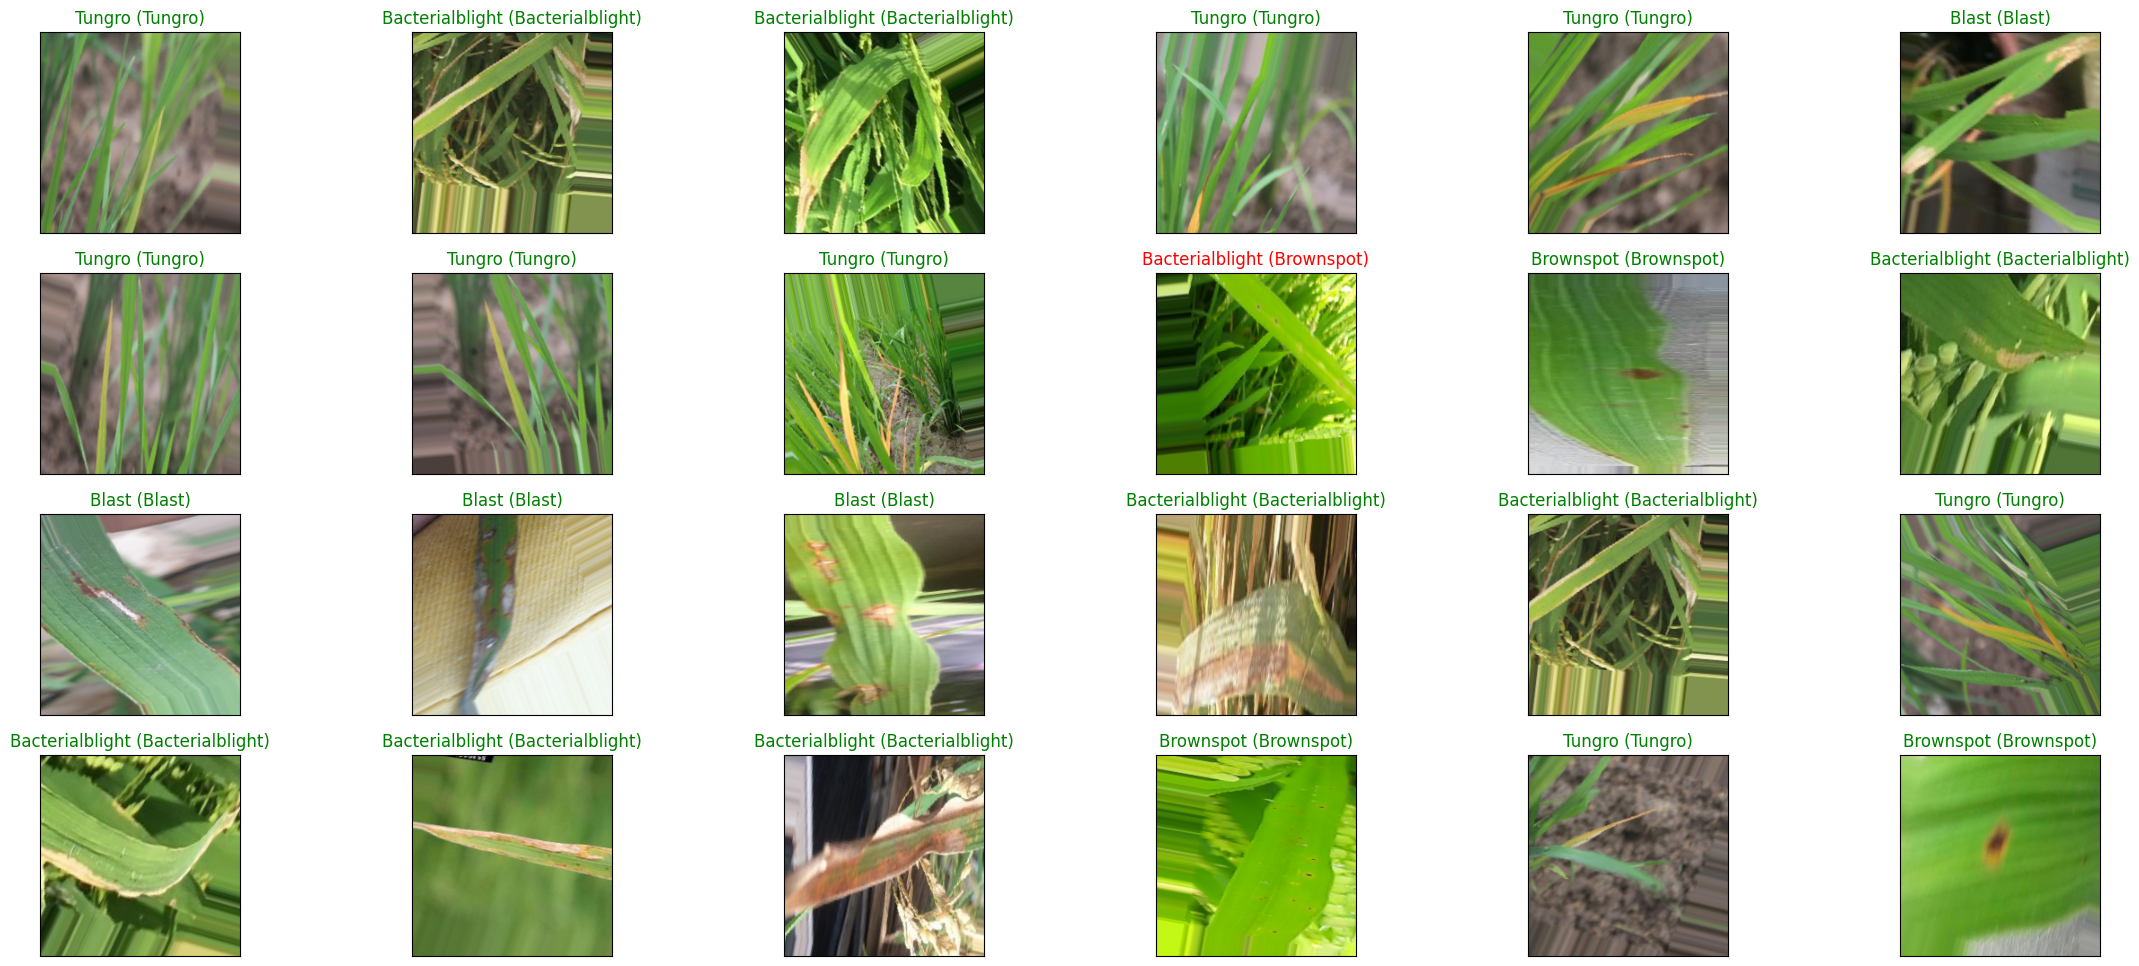

In [ ]:
label_dict = {0 : 'Bacterialblight', 1 : 'Blast', 2 : 'Brownspot', 3 : 'Tungro'}

figure = plt.figure(figsize=(28, 12))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=24)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    predict_index_vgg = label_dict[(y_pred_vgg[index])]
    true_index_vgg = label_dict[np.argmax(y_test,axis=1)[index]]

    ax.set_title("{} ({})".format((predict_index_vgg),
                                  ( true_index_vgg)),
                                  color=("green" if predict_index_vgg == true_index_vgg else "red"))